Given the inputs of Process ID, Arrival Time, Burst Time, Priority and Scheduling Algorithm, compute the Average Wait Time, Average Turnaround Time, and The Average Response Time for the following Scheduling Algorithims: FCFS, SJF, SRTF, Priority Scheduling [no aging], and Round Robin.

Use the given code to show what the ghant chart would like like for all of the Scheduling Algorithms.


You will need to read the information about the process from a file.  The file name will be data.csv, and its path will be: /content/data.csv

You will need to create a procedure for each of the scheduling algorithms.  You will need to produce an n x m table of the result and the graphical representation of the ghant chart.



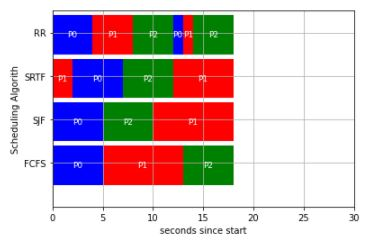




Algorithm            Avg. Wait Time       Avg. Turnaround Time Avg. Response Time  
FCFS                 8.75                 15.25                8.75                
SJF                  7.75                 14.25                7.75                
SRTF                 6.5                  13.0                 4.25                
Priority Scheduling  7.75                 14.25                7.75                
Round Robin [4]      19.0                 18.25                4.5                 




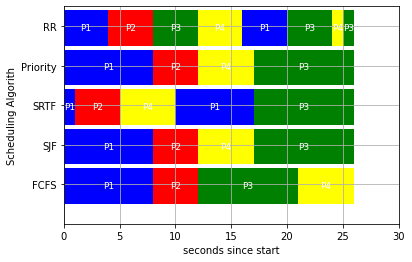

In [ ]:
def csvToArray():
  import csv

  a = []
  # opening the CSV file
  with open('/content/data.csv', mode ='r')as file:
    csvFile = csv.reader(file)
    totalTime = 0
    for lines in csvFile:
      lines[0] = int(lines[0])
      lines[1] = int(lines[1])
      lines[2] = int(lines[2])
      lines[3] = int(lines[3])
      a.append(lines)
      totalTime = totalTime + lines[2]
  return a, totalTime

def fcfs(a, totalTime):
  import numpy as np
  np_Grid = np.array(a)
  # sort by pID if not already sorted
  np_Grid = np_Grid[np_Grid[:, 0].argsort()]

  pID = []
  # start times
  st = []
  # burst times
  bt = []

  # wait times
  wt = []
  # turnaround times
  tt = []
  # response times
  rt = []

  time = 0

  while time < totalTime:
    # response and wait time are found by subtracting arrival time from current time
    wt.append(time - np_Grid[0][1])
    rt.append(time - np_Grid[0][1])
    st.append(time)
    # increment time using burst time
    time = time + np_Grid[0][2]
    pID.append(np_Grid[0][0])
    bt.append(np_Grid[0][2])
    # turnaround time is cound after incrementing time
    tt.append(time - np_Grid[0][1])
    # delete current entry
    np_Grid = np.delete(np_Grid, 0, 0)

  return pID, st, bt, wt, tt, rt

def sjf(a, totalTime):
  import numpy as np
  np_Grid = np.array(a)
  np_Grid = np_Grid[np_Grid[:, 0].argsort()]

  pID = []
  st = []
  bt = []
  # new array for adding entries once their arrival time has occured
  newA = []

  wt = []
  tt = []
  rt = []

  time = 0

  for i in np_Grid:
    # add entries to new array if their arrival time is 0. Delete from original array once added
    if time >= i[1]:
      newA.append(i)
      np_Grid = np.delete(np_Grid, 0, 0)

  newA = np.array(newA)

  while time < totalTime:
    # sort new array by burst time
    newA = newA[newA[:, 2].argsort()]
    st.append(time)
    wt.append(time - newA[0][1])
    rt.append(time - newA[0][1])
    time = time + newA[0][2]
    pID.append(newA[0][0])
    bt.append(newA[0][2])
    tt.append(time - newA[0][1])
    # delete entry from new array
    newA = np.delete(newA, 0, 0)
    # search original array for entries that have arrived during the burst time of the previous process
    for i in np_Grid:
      if time >= i[1]:
        addA = []
        addA.append(i)
        newA = np.append(newA, addA, axis=0)
        np_Grid = np.delete(np_Grid, 0, 0)

  return pID, st, bt, wt, tt, rt

def srtf(a, totalTime):
  import numpy as np
  np_Grid = np.array(a)
  np_Grid = np_Grid[np_Grid[:, 0].argsort()]

  pID = []
  st = []
  bt = []
  newA = []
  # arrival times
  at = []
  # progress made on each entry
  progress = []

  wt = []
  tt = []
  rt = []

  time = 0

  for i in np_Grid:
    at.append(i[1])
    progress.append(0)
    wt.append(0)
    if time >= i[1]:
      newA.append(i)
      np_Grid = np.delete(np_Grid, 0, 0)

  newA = np.array(newA)

  # is set to true if the previous entry arrival time was met and a new one should be set
  newStop = False
  # keeps track of the pID of the entry that ran on the previous iteration of the while loop
  previous = 0
  # used to keep track of how many start times have been recorded
  stCount = 0

  while time < totalTime:
    # if the previous stopping point has been reached, record a new stopping point (the arrival time of the next entry that isn't in the new array)
    for i in at:
      if time >= i:
        at.remove(i)
        if len(at) > 0:
          newStop = True
        else:
          newStop = False
    if newStop == True:
      stop = at[0] - time
      newStop = False
    newA = newA[newA[:, 2].argsort()]
    arrival = newA[0][1]
    # wait time is incremented by the current time subtracted by the entry's arrival time and progress thus far.
    wt[newA[0][0] - 1] = wt[newA[0][0] - 1] + (time - (arrival + progress[newA[0][0] - 1]))
    # if this is the first time this process is running, the response time is recorded.
    if progress[newA[0][0] - 1] == 0:
      rt.append(time - arrival)
    if newA[0][0] == previous:
      previous = newA[0][0]
      if stop > 0:
        # if this entry is the same as the entry that ran in the previous iteration of the while loop and the burst time of the entry is greater than the next stopping point:
        if newA[0][2] > stop:
          # increment the time by the next stopping point
          time = time + stop
          # decrease burst time by stop time
          newA[0][2] = newA[0][2] - stop
          # increment progress of the entry by the stop time
          progress[newA[0][0] - 1] = progress[newA[0][0] - 1] + stop
        else:
          # if entry is the same as the last entry and stop time is greater or equal to burst time of the entry:
          # increment by burst time
          time = time + newA[0][2]
          # decrease stop time by burst time
          stop = stop - newA[0][2]
          tt.append(time - arrival)
          newA = np.delete(newA, 0, 0)
      else:
        # if this entry is the same as the last and there is no next stop time:
        time = time + newA[0][2]
        tt.append(time - arrival)
        newA = np.delete(newA, 0, 0)
    else:
      # if this entry is different from the last:
      previous = newA[0][0]
      pID.append(newA[0][0])
      st.append(time)
      # increment number of starting times 
      stCount = stCount + 1
      # don't record burst time of previous entry if there was no previous entry. Otherwise, this records the burst time of the previous entry.
      if time > 0:
        bt.append(time - st[stCount - 2])
      if stop > 0:
        if newA[0][2] > stop:
          # if the next stopping point is less then the current burst time:
          time = time + stop
          newA[0][2] = newA[0][2] - stop
          progress[newA[0][0] - 1] = progress[newA[0][0] - 1] + stop
        else:
          # if stopping point is greater or equal to next burst time:
          time = time + newA[0][2]
          stop = stop - newA[0][2]
          tt.append(time - arrival)
          newA = np.delete(newA, 0, 0)
      else:
        # if there is no next stopping point:
        time = time + newA[0][2]
        tt.append(time - arrival)
        newA = np.delete(newA, 0, 0)

    # if this is the last entry, record it's burst time.
    if time == totalTime:
      bt.append(time - st[stCount - 1])

    for i in np_Grid:
      if time >= i[1]:
        addA = []
        addA.append(i)
        newA = np.append(newA, addA, axis=0)
        np_Grid = np.delete(np_Grid, 0, 0)

  return pID, st, bt, wt, tt, rt

def priority(a, totalTime):
  import numpy as np
  np_Grid = np.array(a)
  np_Grid = np_Grid[np_Grid[:, 0].argsort()]

  pID = []
  st = []
  bt = []
  newA = []
  at = []

  wt = []
  tt = []
  rt = []
  progress = []

  time = 0

  for i in np_Grid:
    at.append(i[1])
    progress.append(0)
    wt.append(0)
    if time >= i[1]:
      newA.append(i)
      np_Grid = np.delete(np_Grid, 0, 0)

  newA = np.array(newA)

  newA = newA[newA[:, 2].argsort()]

  newStop = False
  previous = 0
  stCount = 0

  while time < totalTime:
    for i in at:
      if time >= i:
        at.remove(i)
        if len(at) > 0:
          newStop = True
        else:
          newStop = False
    if newStop == True:
      stop = at[0] - time
      newStop = False
    if newA[0][0] != previous:
      newA = newA[newA[:, 2].argsort()]
    # sort by priority
    newA = newA[newA[:, 3].argsort()]
    # record the arrival time of the current entry
    arrival = newA[0][1]
    wt[newA[0][0] - 1] = wt[newA[0][0] - 1] + (time - (arrival + progress[newA[0][0] - 1]))
    if progress[newA[0][0] - 1] == 0:
      rt.append(time - arrival)
    if newA[0][0] == previous:
      previous = newA[0][0]
      if stop > 0:
        if newA[0][2] > stop:
          time = time + stop
          newA[0][2] = newA[0][2] - stop
          progress[newA[0][0] - 1] = progress[newA[0][0] - 1] + stop
        else:
          time = time + newA[0][2]
          stop = stop - newA[0][2]
          tt.append(time - arrival)
          newA = np.delete(newA, 0, 0)
      else:
        time = time + newA[0][2]
        tt.append(time - arrival)
        newA = np.delete(newA, 0, 0)
    else:
      previous = newA[0][0]
      pID.append(newA[0][0])
      st.append(time)
      stCount = stCount + 1
      if time > 0:
        bt.append(time - st[stCount - 2])
      if stop > 0:
        if newA[0][2] > stop:
          time = time + stop
          newA[0][2] = newA[0][2] - stop
          progress[newA[0][0] - 1] = progress[newA[0][0] - 1] + stop
        else:
          time = time + newA[0][2]
          stop = stop - newA[0][2]
          tt.append(time - arrival)
          newA = np.delete(newA, 0, 0)
      else:
        time = time + newA[0][2]
        tt.append(time - arrival)
        newA = np.delete(newA, 0, 0)

    if time == totalTime:
      bt.append(time - st[stCount - 1])

    for i in np_Grid:
      if time >= i[1]:
        addA = []
        addA.append(i)
        newA = np.append(newA, addA, axis=0)
        np_Grid = np.delete(np_Grid, 0, 0)

  return pID, st, bt, wt, tt, rt

def rr(a, totalTime):
  import numpy as np
  np_Grid = np.array(a)
  np_Grid = np_Grid[np_Grid[:, 0].argsort()]

  pID = []
  st = []
  bt = []
  newA = []

  wt = []
  tt = []
  rt = []
  progress = []

  time = 0

  # keeps track of the number of entries currently in the new array
  entries = 0
  # keeps track of which entry in the new array is being run
  spot = 0

  for i in np_Grid:
    progress.append(0)
    wt.append(0)
    if time >= i[1]:
      newA.append(i)
      np_Grid = np.delete(np_Grid, 0, 0)
      # increment the number of entries
      entries = entries + 1

  newA = np.array(newA)

  while time < totalTime:
    st.append(time)
    pID.append(newA[spot][0])
    arrival = newA[spot][1]
    wt[newA[spot][0] - 1] = wt[newA[spot][0] - 1] + (time - (arrival + progress[newA[spot][0] - 1]))
    if progress[newA[spot][0] - 1] == 0:
      rt.append(time - arrival)
    if newA[spot][2] > 4:
      # if the burst time of the current entry is greater than 4:
      # add 4 to the burst time array
      bt.append(4)
      # decrease the burst time of the entry by 4
      newA[spot][2] = newA[spot][2] - 4
      # increment time by 4
      time = time + 4
      # increment the progress of this entry by 4
      progress[newA[spot][0] - 1] = progress[newA[spot][0] - 1] + 4
    else:
      # if burst time is less than or equal to 4:
      # add the current entry's burst time to the array
      bt.append(newA[spot][2])
      time = time + newA[spot][2]
      tt.append(time - arrival)
      newA = np.delete(newA, spot, 0)
      # decrease the number of current entries in the new array by 1
      entries = entries - 1
      # move the spot back one
      spot = spot - 1
    # move the spot up one
    spot = spot + 1
    for i in np_Grid:
      if time >= i[1]:
        addA = []
        addA.append(i)
        newA = np.append(newA, addA, axis=0)
        np_Grid = np.delete(np_Grid, 0, 0)
        entries = entries + 1
    if spot >= entries:
      # if the spot is greater than or equal to the number of entries in the array, move the spot to the first position (0)
      spot = 0

  return pID, st, bt, wt, tt, rt

import matplotlib.pyplot as plt
import numpy as np

# Bar graph creation
colors = ['grey', 'blue','red','green','yellow', 'orange', 'purple', 'cyan','pink','darkgreen','gold','grey']


fig, gnt = plt.subplots()
 
gnt.set_ylim(0,55)
 
gnt.set_xlim(0, 30)
 
gnt.set_xlabel('seconds since start')
gnt.set_ylabel('Scheduling Algorith')
 
gnt.set_yticks([10,20,30,40,50])
gnt.set_yticklabels(['FCFS','SJF','SRTF','Priority','RR'])
 

gnt.grid(True)

a, totalTime = csvToArray()

position = 0 
processID, startTime, burstTime, waitTime, turnTime, responseTime = fcfs(a, totalTime)

# get average wait, turnaround, and response times for teh array
a1 = np.array(waitTime)
wt1 = np.mean(a1)
a2 = np.array(turnTime)
tt1 = np.mean(a2)
a3 = np.array(responseTime)
rt1 = np.mean(a3)


# create bars for this algorithm
y = (position * 10) + 5

for i in range(0, len(processID)): 
  gnt.broken_barh([(startTime[i], burstTime[i]  ) ], (y, 9), facecolors = colors[processID[i]])
  x = float(startTime[i]) + float(float(burstTime[i]) / 2.0) - 0.5
  gnt.text( x, y +4, "P" + str(processID[i]), color = 'white', fontsize=9) 


position = 1
processID, startTime, burstTime, waitTime, turnTime, responseTime = sjf(a, totalTime)

a1 = np.array(waitTime)
wt2 = np.mean(a1)
a2 = np.array(turnTime)
tt2 = np.mean(a2)
a3 = np.array(responseTime)
rt2 = np.mean(a3)

y = (position * 10) + 5

for i in range(0, len(processID)): 
  gnt.broken_barh([(startTime[i], burstTime[i]  ) ], (y, 9), facecolors = colors[processID[i]])
  x = float(startTime[i]) + float(float(burstTime[i]) / 2.0) - 0.5
  gnt.text( x, y +4, "P" + str(processID[i]), color = 'white', fontsize=9)

position = 2
processID, startTime, burstTime, waitTime, turnTime, responseTime = srtf(a, totalTime)

a1 = np.array(waitTime)
wt3 = np.mean(a1)
a2 = np.array(turnTime)
tt3 = np.mean(a2)
a3 = np.array(responseTime)
rt3 = np.mean(a3)

y = (position * 10) + 5

for i in range(0, len(processID)): 
  gnt.broken_barh([(startTime[i], burstTime[i]  ) ], (y, 9), facecolors = colors[processID[i]])
  x = float(startTime[i]) + float(float(burstTime[i]) / 2.0) - 0.5
  gnt.text( x, y +4, "P" + str(processID[i]), color = 'white', fontsize=9) 

position = 3
processID, startTime, burstTime, waitTime, turnTime, responseTime = priority(a, totalTime)

a1 = np.array(waitTime)
wt4 = np.mean(a1)
a2 = np.array(turnTime)
tt4 = np.mean(a2)
a3 = np.array(responseTime)
rt4 = np.mean(a3)

y = (position * 10) + 5

for i in range(0, len(processID)): 
  gnt.broken_barh([(startTime[i], burstTime[i]  ) ], (y, 9), facecolors = colors[processID[i]])
  x = float(startTime[i]) + float(float(burstTime[i]) / 2.0) - 0.5
  gnt.text( x, y +4, "P" + str(processID[i]), color = 'white', fontsize=9) 

position = 4
processID, startTime, burstTime, waitTime, turnTime, responseTime = rr(a, totalTime)

a1 = np.array(waitTime)
wt5 = np.mean(a1)
a2 = np.array(turnTime)
tt5 = np.mean(a2)
a3 = np.array(responseTime)
rt5 = np.mean(a3)

y = (position * 10) + 5

for i in range(0, len(processID)): 
  gnt.broken_barh([(startTime[i], burstTime[i]  ) ], (y, 9), facecolors = colors[processID[i]])
  x = float(startTime[i]) + float(float(burstTime[i]) / 2.0) - 0.5
  gnt.text( x, y +4, "P" + str(processID[i]), color = 'white', fontsize=9) 

# Print table of the average wait, turnaround, and respone times for each algorithm.
print("\n")
print ("{:<20} {:<20} {:<20} {:<20}".format('Algorithm','Avg. Wait Time','Avg. Turnaround Time','Avg. Response Time'))
print ("{:<20} {:<20} {:<20} {:<20}".format('FCFS', wt1, tt1, rt1))
print ("{:<20} {:<20} {:<20} {:<20}".format('SJF', wt2, tt2, rt2))
print ("{:<20} {:<20} {:<20} {:<20}".format('SRTF', wt3, tt3, rt3))
print ("{:<20} {:<20} {:<20} {:<20}".format('Priority Scheduling', wt4, tt4, rt4))
print ("{:<20} {:<20} {:<20} {:<20}".format('Round Robin [4]', wt5, tt5, rt5))
print("\n")
